In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47
data_path = '../../data/SI_Fig09'
land_path = '../../data/common_data/land_mask.tif'

lytools version 0.0.47


In [2]:
def plot_spatial(ax,fpath,vmin=None,vmax=None,cmap=None):
    ## plot spatial figure
    array = ToRaster().raster2array(fpath)[0]
    # mask nan values
    array[array < -9999] = np.nan
    # above 30 degree
    array = array[:120]
    # plot the spatial figure
    pcm = ax.imshow(array, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto', interpolation='nearest')
    # plot the land mask
    arr = ToRaster().raster2array(land_path)[0]
    back_ground = []
    for i in range(len(arr)):
        temp = []
        for j in range(len(arr[0])):
            val = arr[i][j]
            if val < -90000:
                temp.append(np.nan)
            else:
                temp.append(1)
        back_ground.append(temp)
    back_ground = np.array(back_ground)
    ax.imshow(back_ground[:int(len(arr) / 2)], 'gray', vmin=0, vmax=1.4, zorder=-1, aspect='auto', interpolation='nearest')
    return pcm


In [3]:
def plot_SI_Fig9():
    ## plot figure S9
    lc_list = [
        'evergreen',
        'deciduous',
        'Shrublands',
        'Grasslands',
    ]
    color_list = ['#13162D','#413186','#AC93C1']
    cmap = sns.blend_palette(color_list,as_cmap=True,)
    cmap_dict = {'evergreen':'Greens_r', 'deciduous':cmap, 'Shrublands':'Blues_r','Grasslands':'Reds_r'}

    fig,axs = plt.subplots(2,1,figsize=(10,7))
    for lc in lc_list:
        fname = f'kp_lc_{lc}.tif'
        fpath = join(data_path, fname)
        ax = axs[0]
        pcm = plot_spatial(ax,fpath,cmap=cmap_dict[lc])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

    legend_f = join(data_path,'legend.jpg')
    legend_img = plt.imread(legend_f)
    ax1 = axs[1]
    ax1.imshow(legend_img)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.axis('off')
    ax1.set_aspect('equal', 'box')
    plt.show()


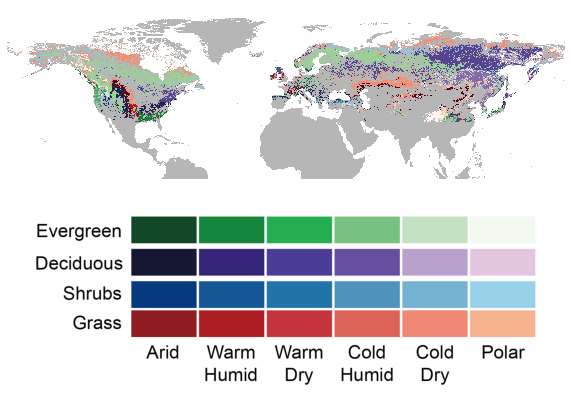

In [4]:
plot_SI_Fig9()